In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

**1. Load Data**

In [3]:
# Load the data as pandas dataframe
df = pd.read_csv('../dataset/cars.csv')

In [4]:
# Check the first five rows in the data
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [5]:
# Check the number of rows in the data
df.shape

(8128, 13)

In [6]:
# Show the non null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# List out the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

As the name of columns are perfect to be used, no updates are applied to make them more readable and accessible.

**2 Explatory Data Analysis**

2.1 Cleaning the data

First all the unnecessary feature data are to be removed such as units and brand related information.

In [8]:
# Here we define a function to return float values for features with pattern "floatvalue + unit"
# Example for feature km_driven, if data is "12345 km", then 12345.00 is returned

def getFloatValues(featureValues):
    # all values are converted to string in case there are any float or integer values
    featureValues = featureValues.astype(str)

    # the first part of values are separated and converted to float values and mapped
    # in case the values can not be converted to float, then values are set to 0
    for index, x in enumerate(featureValues):
        try:
            featureValues[index] = float(x.split(' ')[0])
        except ValueError:
            featureValues[index] = 0

    return featureValues

In [9]:
# For feature name, the brand name of the car is kept. The first word in the name is assumed to be brand name
df['name'] = df['name'].map(lambda x : x.split(' ')[0])

# For feature mileage, the unit kmpl is removed and values converted into float values
df['mileage'] = getFloatValues(df['mileage'])
df['mileage'] = df['mileage'].astype('float')

# For feature engine, the unit CC is removed and values converted into float values
df['engine'] = getFloatValues(df['engine'])
df['engine'] = df['engine'].astype('float')

# For feature max_power, the unit bhp is removed and values converted into float values
df['max_power'] = getFloatValues(df['max_power'])
df['max_power'] = df['max_power'].astype('float')

# For feature torque, it is dropped due insignifcance to car company
df = df.drop('torque', axis = 1)

# For feature fuel, all the rows with values LPG and CNG are removed
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40  1248.0      74.00    5.0  
1  Second Owner    21.14  1498.0     103.52    5.0  
2   Third Owner    17.70  1497.0      78.00    5.0  
3   First Owner    23.00  1396.0      90.00    5.0  
4   First Owner    16.10  1298.0      88.20    5.0

In [10]:
df.shape

(8033, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.9+ KB


2.2 Univariate analysis

Countplot

Count plot can be used to see the number of rows for a label for a categorical feature

<Axes: xlabel='seller_type', ylabel='count'>

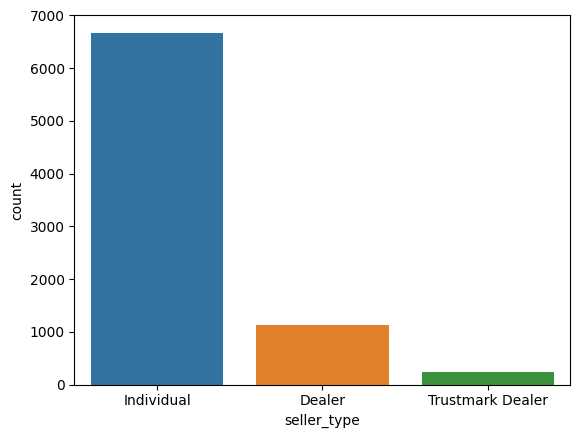

In [12]:
# Let's see how many individual and dealer sellers are there
sns.countplot(data = df, x = 'seller_type')

Distribution plot

Distribution plot can plot the distribution of continous values. It helps in identifying the type of distribution for the feature

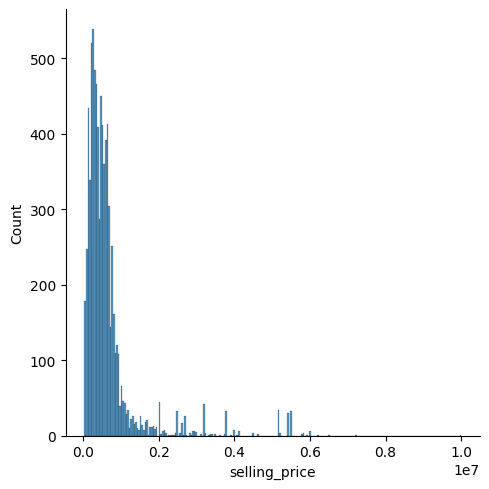

In [13]:
# Distribution plot for selling prices
sns.displot(data = df, x = 'selling_price')

2.2 Multivariate Analysis

Multiple variable exploratory analysis

Boxplot

Text(0.5, 0, 'Owner')

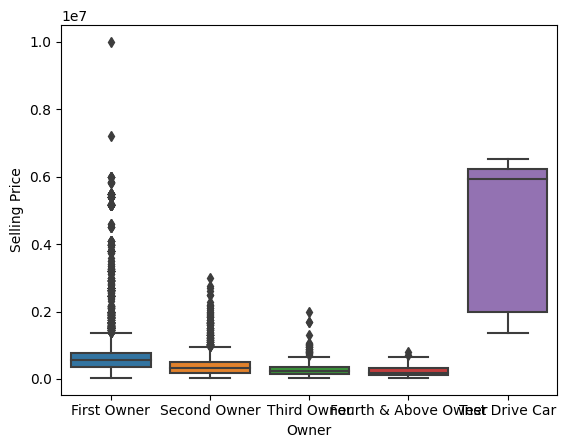

In [14]:
# Box plot for 'owner' and 'selling_price'
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

Scatterplot

<Axes: xlabel='mileage', ylabel='selling_price'>

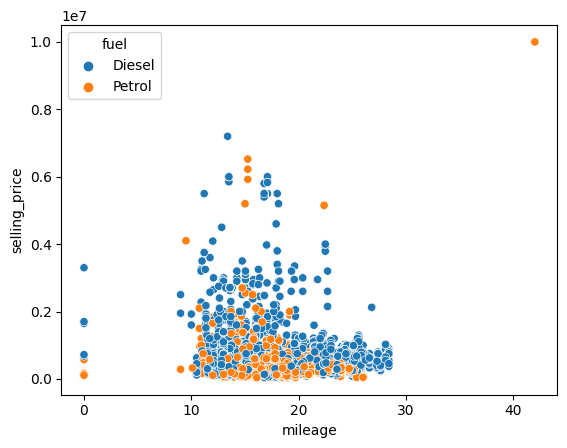

In [15]:
# Scatter plot for mileage and selling price with respect to fuel type

sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue =df['fuel'])

Corelation Matrix

<Axes: >

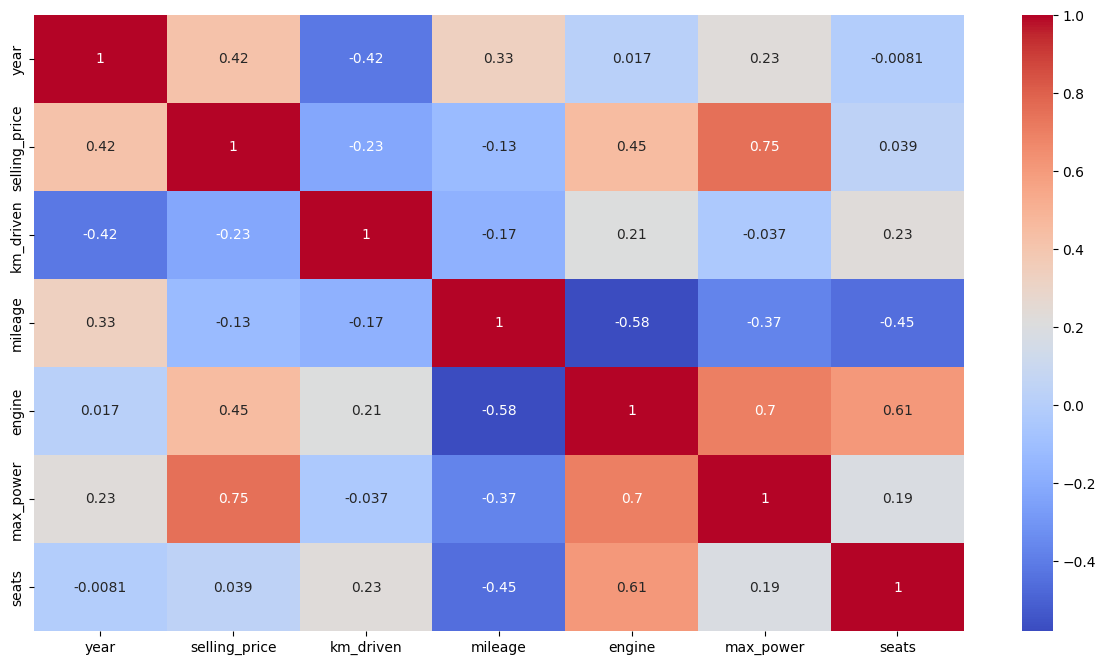

In [16]:
# Let's check out heatmap

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Currently, feature max_power and engine have shown strong correlation to selling price. However, the above graph does not include categorical features.

Label Encoding

Lets encode the labels for the present categorical featues

In [17]:
# Importing the LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

All the categorical features except 'owner' are label encoded through LabelEncoder class

In [18]:
# Loading the features into list
categorical_features = ['name', 'seller_type', 'fuel', 'transmission']

# Each feature in the list are label encoded 
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    le.transform(le.classes_)

As the feature 'owner' has the requirement to assign custom encoding to each label, each label has mapped to the required encoding value.

In [19]:
mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(lambda x : mapping[x])

# Removing the rows with Test Drive Car value
df = df[~df['owner'].isin([5])]

Now that all the categorical labels have been encoded into integer values, lets look into our current data

In [20]:
df.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0    20  2014         450000     145500     0            1             1   
1    27  2014         370000     120000     0            1             1   
2    10  2006         158000     140000     1            1             1   
3    11  2010         225000     127000     0            1             1   
4    20  2007         130000     120000     1            1             1   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

Now the correlation matrix will display the values for these converted features as well

<Axes: >

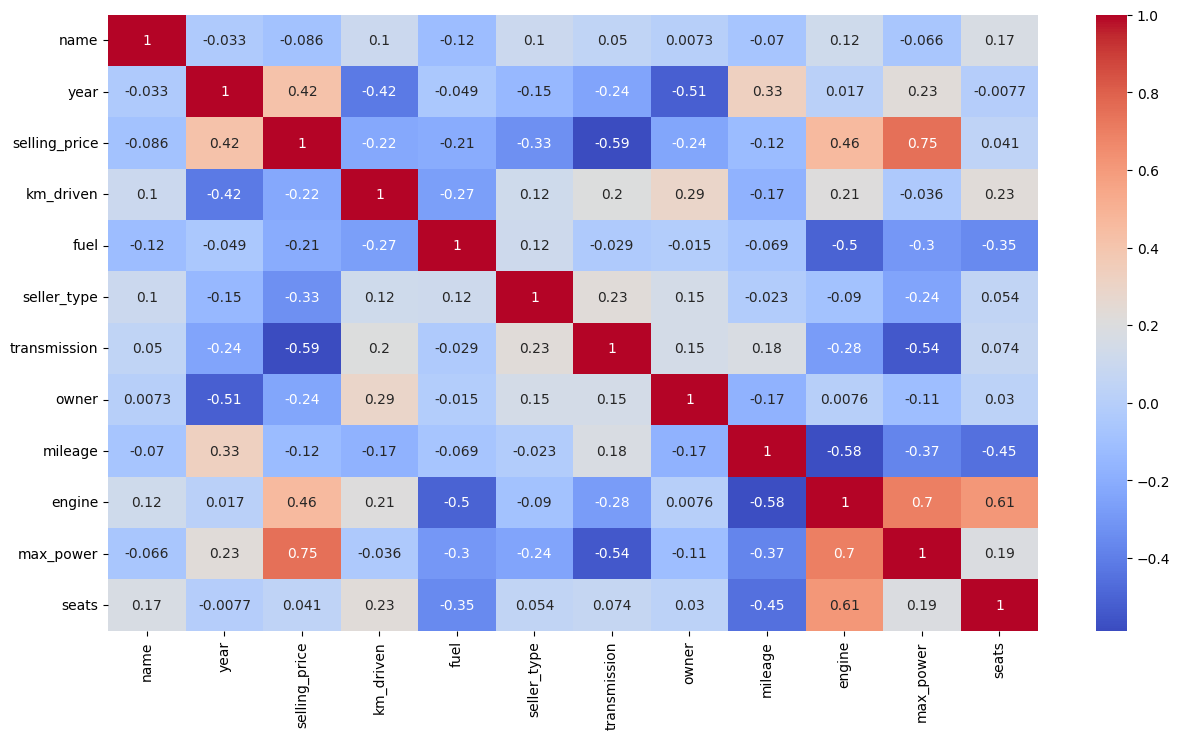

In [21]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

The most correlated features are still found to be engine and max_power

**Predictive Power Socre**

Let's check the predictive power scores of features. This graph plots the direct predictive power of a feature against another feature.

<Axes: xlabel='x', ylabel='y'>

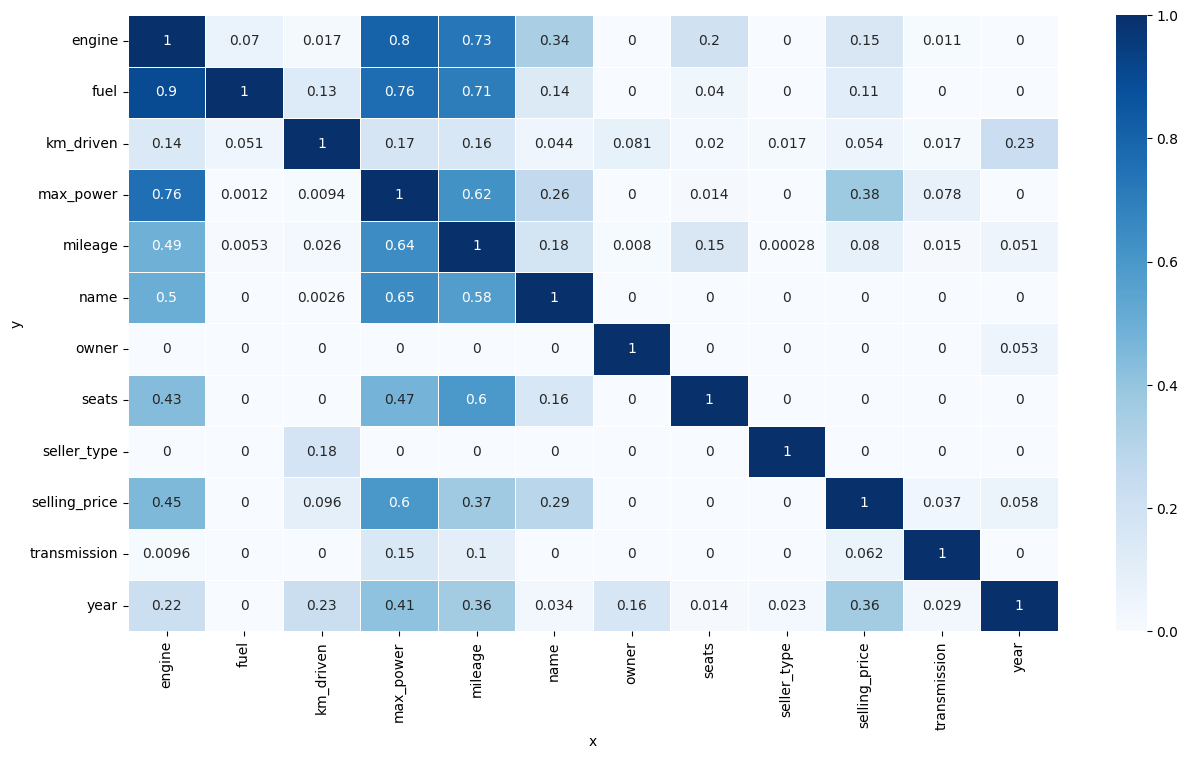

In [22]:
import ppscore as pps

dfcopy = df.copy()

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

**3. Feature Selection**

In [23]:
# According the corelation matrix and pps scores, the most strong features are max_power, engine and mileage
# Therefore, X is set to those features

X = df[['max_power', 'engine', 'mileage']]

# y is the selling price. As selling price values are too big, they will transformed with log
y = np.log(df['selling_price'])

**4. Test Train Split**

The training and test data are split into 7:3 ratio

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**5 Preprocessing**

5.1 Checking for null values

Here all the null values for the features are filled with appropriate values

In [25]:
# Checking for null values in X for training set
X_train[['max_power', 'engine', 'mileage']].isna().sum()

max_power    149
engine       154
mileage      154
dtype: int64

In [26]:
# Checking for null values in X for test set
X_test[['max_power', 'engine', 'mileage']].isna().sum()

max_power    59
engine       60
mileage      60
dtype: int64

In [27]:
#Checking for null values in y
y_train.isna().sum()
y_test.isna().sum()

0

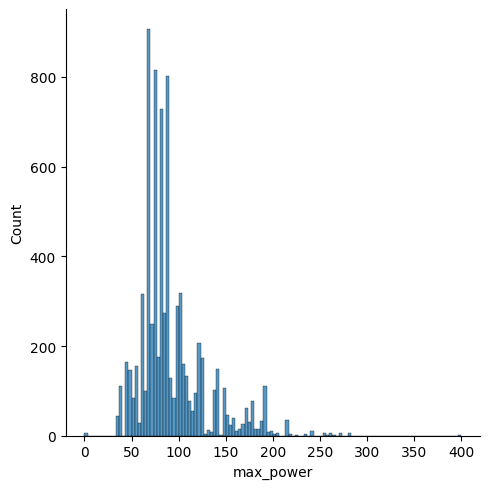

In [28]:
# Distribution plot for max_power
sns.displot(data=df, x = 'max_power')

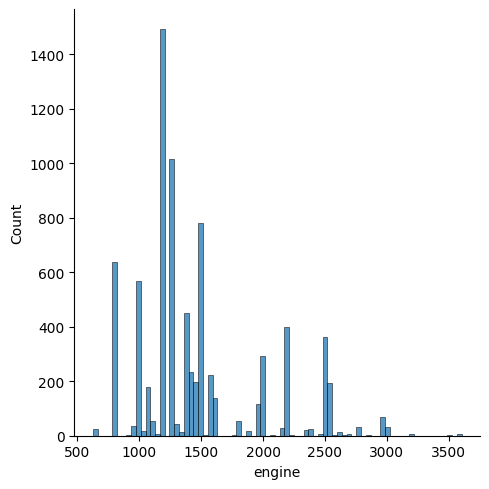

In [29]:
# Distribution plot for mileage
sns.displot(data=df, x = 'engine')

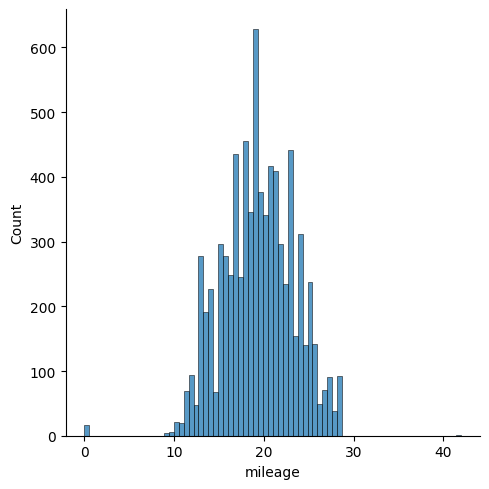

In [30]:
# Distribution plot for mileage
sns.displot(data=df, x = 'mileage')

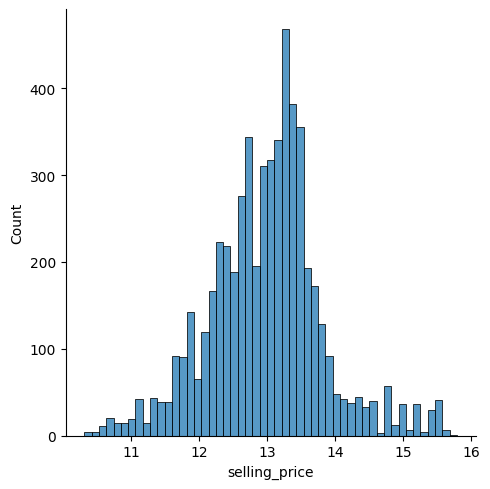

In [31]:
# Distribution plot selling price for training
sns.displot(y_train)

In [32]:
# The null values for features max power and engine are filled with median values
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

# The null values for feature mileage are filled with mean values as mileage values resemnle normal distribution
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace= True)

In [33]:
# The same process above is repeated for test data as well
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace= True)

In [34]:
# Final check for null values for X in training and test sets
X_train[['max_power', 'engine', 'mileage']].isna().sum()
X_test[['max_power', 'engine', 'mileage']].isna().sum()

max_power    0
engine       0
mileage      0
dtype: int64

As the values for y have no null values, the y_train and y_test are not updated in this process.

**5.2 Checking Outliers**

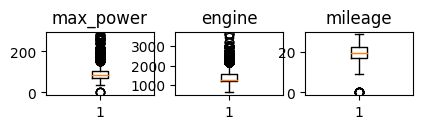

In [35]:
# Create a dictionary of columns

col_dict = {'max_power': 1, 'engine': 2, 'mileage': 3}

# Box plots to detect outliers in each variables

for variable, i in col_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(X_train[variable])
  plt.title(variable)

plt.show()

In [36]:
# This method takes feature name and training set as parameters and print the number and percentage of outliers present for the feature
def outlier_count(col, data = X_train):

    # calculate your 25% quatile and 75% quartile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quartile
    iqr = q75 - q25

    # Calculating max_value and min_value for the feature
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # The number of outliers is counted on basis if the value is greater than max value or less than the min value
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [37]:
# Method call for finding out outliers in all features in training set
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


From above, feature engine has the highest number of outliers at 14.88%. While the percentage is high and may affect the training model but it has shown good scores in corelation matrix and pps score graph. Usually, the values of engine do tend to affect the prices in real world as well. Hence, engine will be used to train the model.

To mitigate the effects of outliers, all the training set will be scaled by Standard Scaler to covert the data into more consistent form.

**5.3 Scaling**

For scaling the features of training and test set, Robust Scaler will be used. The process of scaling generally helps in faster convergence while training data.

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [39]:
# Shape check for X_train, X_test, y_train, y_test before model fitting
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


**6 Modeling**

Cross validation + Grid search

For choosing the best algorithm, cross validation  is applied to find out the algorithm that yields the lowest MSE.
The algorithm with the lowest MSE will be chosen for grid search and fit our training set.

In [40]:
# Import the algorithm libaries to be tried out
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Listing out the algorithms to be tried out
algorithms = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state = 0),
    RandomForestRegressor(n_estimators = 200, random_state = 42),
    XGBRegressor(n_estimators = 200, random_state = 42)
]

algorithm_names = [
    "Linear Regression",
    "SVR",
    "KNeighbors Regressor",
    "Decision-Tree Regressor",
    "Random-Forest Regressor",
    "XGBregressor"
]

In [41]:
# Import library KFold and cross_val_score
# These libaries will cross validate the best scores between algorithms and result mean of best score for each algorith
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

# KFold split is set to 10, hence the mean of ten scores will be taken
kfold = KFold(n_splits = 10, shuffle=True)

# Looping each algorithm for cross validation using training data
# The scoring is set to best negative mean squared error
for i, model in enumerate(algorithms):
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=kfold,
        scoring='neg_mean_squared_error'
    )
    
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.29681142 -0.27271557 -0.27688241 -0.27656619 -0.27593439 -0.30451357
 -0.25932215 -0.25678848 -0.30051008 -0.29223121]; Mean: -0.2812275460816783
SVR - Score: [-0.23722845 -0.22196643 -0.20258316 -0.24472705 -0.25291203 -0.20856389
 -0.23355543 -0.21709359 -0.2414158  -0.23000462]; Mean: -0.22900504420396048
KNeighbors Regressor - Score: [-0.10850541 -0.10004054 -0.09377735 -0.09816404 -0.11056025 -0.10573378
 -0.1180505  -0.1028697  -0.1089801  -0.09385129]; Mean: -0.10405329584844414
Decision-Tree Regressor - Score: [-0.09512012 -0.08631504 -0.09170701 -0.10770003 -0.11248908 -0.10903718
 -0.09198113 -0.07837904 -0.09626582 -0.10415426]; Mean: -0.09731487031196318
Random-Forest Regressor - Score: [-0.08165575 -0.09268005 -0.09252731 -0.09350527 -0.07893084 -0.08553136
 -0.07354437 -0.1114429  -0.09383033 -0.09359093]; Mean: -0.08972391099371599
XGBregressor - Score: [-0.07437836 -0.08193566 -0.09955929 -0.10531248 -0.07881191 -0.08396651
 -0.07863496 -0

From above, it is found that XBGRegressor has the lowest MSE. Hence, grid search will implemented under that algorithm. Here we will also define hyper parameters for the grid. Currently, the chosen parameters are max_depth, n_estimators and learning rate.

The grid search will figure out the best value for each hyperparameters that yields the lowest error 

In [42]:
# Importing Grid Search Library
# Grid Search takes in an algorithm and applies different values to hyperparaemeters and computes resulst for each permutation of parameter values
from sklearn.model_selection import GridSearchCV

# Defining the values for parameters
param_grid = {
    'max_depth': [5, 10, None],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.2]
}

xgb = XGBRegressor(random_state = 42)

# Initalize grid for XBGRegressor algorithm with above parameters values
# The scoring is to best negative mean squared error
grid = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid,
    cv = kfold,
    n_jobs = -1,
    return_train_score=True,
    refit=True,
    scoring='neg_mean_squared_error'
)

# The training set is fitted to the above grid
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': [5, 10, None],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
# Check the best parameters values while training the model
grid.best_params_

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 500}

In [44]:
# Check the best mse value from the grid
# The best mse is result of applying the best paramater values in XGBRegressor algorithm
best_mse = grid.best_score_
best_mse

-0.08626911482197705

**7. Testing**

As the best MSE value has been satisfactory to our need, the model is tested on test set below. The X_test has been already scaled and y_test has been logarithm scaled like the training set.

In [45]:
from sklearn.metrics import mean_squared_error

yhat = grid.predict(X_test)

mean_squared_error(yhat, y_test)

0.08371498311349586

The mean squared error from the test set is similar to best mse from the training set. Hence, the model has been successfully trained. 

**8. Feature Analysis**

The main point of feature analysis is to distinguish the most important and relevant features in the model. Each feature may provide different level of significance in the model.

8.1. Using the available grid methods

The grid also provides the level of importance of each features used in training the model along with the best parameters.

Each features is given a score from 0 t0 1 on their importance in training the data. The values are plotted in bar graph below


Text(0.5, 0, 'XGB Regressor Feature Importance')

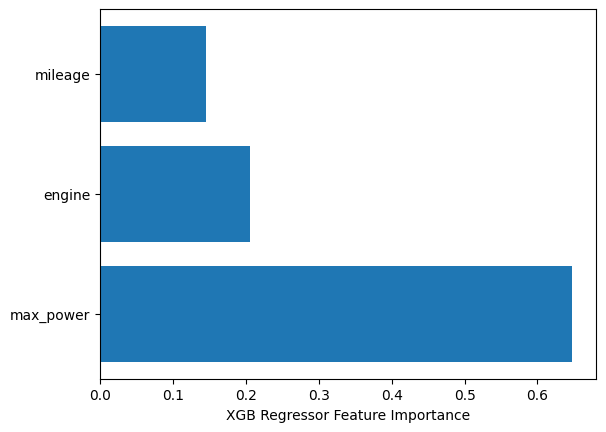

In [46]:
xgb_best_estimator = grid.best_estimator_

# Extracting the feature importance scores from the grid
xgb_best_estimator.feature_importances_

# Bar plot for the features and thier importance
plt.barh(X.columns, xgb_best_estimator.feature_importances_)
plt.xlabel("XGB Regressor Feature Importance")

8.2. Using SHAP

The SHAP libaray is a model agnostic library. It calculates shap values which considers all possible combinations of features and their contributions to the prediction.

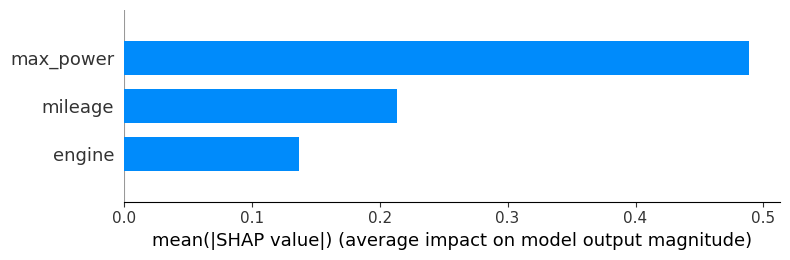

In [47]:
import shap

explainer = shap.TreeExplainer(xgb_best_estimator)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

From above analysis, feature max_power has the most siginifance in predicting the selling price. Both features mileage and engine have significantly less affect in prediction compared to max_power. 

**9. Inference**

As our model has been trained to fit our needs, the model will exported to model file using the pickle library. The model will be accesible to the app to be imported and predict the selling price based on user inputs. 

In [48]:
# Importing pickle library
import pickle

# Exporting the model to selling-price.model
filename = '../model/selling-price.model'
pickle.dump(grid, open(filename, 'wb'))

In [49]:
# We will also dump the scaler values for future use
scaler_filename = '../model/scaler.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))

To use the model, it can be imported and be provided with the feature values as below

In [50]:
# Importing the model
selling_price_model = pickle.load(open("../model/selling-price.model", "rb"))

# Creating a dummy sample
sample = {
    "max_power": [100],
    "engine": [1200],
    "mileage": [23]
}

# Convert the sample to panda dataframe
sample = pd.DataFrame(sample)

# Scale the sample using the same scaler used for X_train and X_set
scaled_sample = scaler.transform(sample)

# Use the model to predict the selling price
predicted_selling_price = selling_price_model.predict(scaled_sample)

# As the we have log transformed the y while training and set, we will need to exponent transform the predicted value for correct prediction
predicted_selling_price = np.exp(predicted_selling_price)

print("The predicted selling price is " + str(predicted_selling_price[0]))

The predicted selling price is 683868.6


**10. Report**

10.1. Summary

The above implemenation has resulted in creating a model to meet the requirements of the car company. The prediction result from the model have been found to be good. The major blocks of the above implemenation are:

- Number of final samples used: 8033
- Split ratio for training and test: 7:3
- Features chosen for training model: max_power, mileage, engine
- Feature to be predicted: selling_price
- Scaler Used: Robust Scaler
- Algorithm Chosen to train the model: XGBRegressor
- Best MSE result for the test set: -0.087 (Negative Squared Mean Error)


10.2. Features Discussion

There were 12 features to be considered for training our model. The feature torque was dropped earlier on due to insigifance and lack of knowledge to the car company. The categorical features were label encoded and the float values were extracted for the other coninous features to be plotted in the correlation matrix and PPS score graph.

The correlation matrix showed strong values for year, engine and max_power. The PPS score graph showed strong values for engine, mileage and max_power. The features for training were selected the based on PPS score graph, and the general knowledge that these feature do signifacntly affect the prices of car in the real world.

In the feature analysis section, the feature max_power has been shown to have significant importance while predicting the result. The feature engine and mileage have comparably equal importance in prediction. Hence, these features have been appropriate for training the model.


12.3. Preprocessing Discussion

The feature engine had significantly more outliers than the other two features. A high number of outliers may affect the training and prediction result of the model. However, the feature was deemed important in order to be dropped. The scaling process was relied upon to mitigate the effects of any outliers on the training. The following three scalers were considered:

- Standard Scaler
- Min Max Scaler
- Robust Scaler

From the above list, Min Max Scaler was found to be too sensitive to outliers. Standard Scaler could perform well but it was too sensitive to extreme outliers. Hence, Robust Scaler was used which was found to be less sensitive to extreme outliers.


10.4 Algorithm Selection Discussion

In order to select the appropriate model for training, the cross validation method was used to get the best mean squared error among different algoriths. The list of the algorithms and their mean scores from cross validation methods are as follows:

| Algorthm | Mean from Cross Validaton |
| -------- | ------------------------- |
| Linear Regression | -0.2812275460816783 |
| SVR | -0.22900504420396048 |
| KNeighbors Regressor | -0.10405329584844414 |
| Decision-Tree Regressor | -0.09731487031196318 |
| Random-Forest Regressor | -0.08972391099371599 |
| XGBregressor |-0.08678452365550038 |

*Scores are from 29th August 2023. Scores are subjected to change if the cross validation is run again*

As from the above table, the best values were acheived from Random Foreset Regressor and XGBRegressor with latter scoring better with some magnitude. Both algorithm were trained and tested using equivalent paramters and XBG was found to be produce consistent better results. Hence, XBG Regressor was chose for the final implmentation.

XGB Regressor has been found to be more strong boosting and strong predictive algorithm which could handle our dataset. The parameters for the XBG Regressor were set as follows:

- max_depth: [5, 10, None],
- n_estimators: [100, 200, 300, 400, 500],
- learning_rate: [0.1, 0.2]

Grid Search was applied to find the best parameter values and best mse score from the algorithm that would train our model. Following were results:

Best value for: 
- learning_rate: 0.1
- max_depth: None
- n_estimators: 500

Best MSE from grid: -0.08626911482197705


10.5 Testing and Conclusion

As the final step in our implementaion, the model was tested using the split test. The MSE for the test was found to be **0.08371498311349586**

The training and testing of model was successful due to favorable results achieved above.